# Shells and Pebbles Detection

* [Google Colab Notebook](https://colab.research.google.com/drive/1Yaxl6XoNH7b1D6dUeLyY20EjU4AECHA1?usp=sharing)
* [Dataset](https://www.kaggle.com/datasets/vencerlanz09/shells-or-pebbles-an-image-classification-dataset)


# Mount GDrive

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load the data

If you use google colab for training, you can use kaggle datasets directly with the help of a token. [Reference](https://www.kaggle.com/general/74235)

In [2]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           9073        274  1.0              
thedevastator/mcdonalds-ice-cream-machines-broken-timeseries   McDonalds Ice Cream Machines Breaking - Timeseries  404KB  2022-09-14 23:51:09            817         35  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           2201         68  1.0              
evangower/premier-league-match-

In [3]:
!kaggle datasets download -d vencerlanz09/shells-or-pebbles-an-image-classification-dataset

!mkdir DATASET_IMAGES
!unzip /content/shells-or-pebbles-an-image-classification-dataset.zip -d /content/DATASET_IMAGES/

 99% 194M/195M [00:01<00:00, 145MB/s]
100% 195M/195M [00:01<00:00, 163MB/s]
Archive:  /content/shells-or-pebbles-an-image-classification-dataset.zip
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (10).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (100).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1000).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1001).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1002).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1003).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1004).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1005).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1006).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1007).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1008).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1009).jpg  

In [5]:
IMAGE_DIR = "images"

In [6]:
# Create a list of all the class names
import os

class_names = sorted(os.listdir(IMAGE_DIR))
class_names

['Pebbles', 'Shells']

# Split into train, test and validation data (using [splitfolders](https://pypi.org/project/split-folders/))

In [7]:
!pip install split-folders

import splitfolders

**Splitting the data into 3 datasets:**
* 70% in training dataset
* 20% in validation dataset
* 10% in testing dataset

In [8]:
splitfolders.ratio(IMAGE_DIR, output="IMAGES", seed=42, ratio=(.7, .2, .1))

Copying files: 4284 files [02:25, 29.52 files/s]


In [65]:
# Defining the training, validation and testing directories
IMAGE_DIR = "images"

TRAIN_DIR = "images/train"
VAL_DIR   = "images/val"
TEST_DIR  = "images/test"


In [66]:
TRAIN_DIR = "images/train"
class_names = sorted(os.listdir(TRAIN_DIR))
print(class_names)


['Pebbles', 'Shells']


# View images in training dataset

In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [68]:
def view_random_images(dirpath, class_names):
    plt.figure(figsize=(15, 5))
    for i in range(1, 6):
        class_name = random.choice(class_names)
        img_path = os.path.join(
            dirpath,
            class_name,
            random.choice(os.listdir(os.path.join(dirpath, class_name)))
        )
        img = mpimg.imread(img_path)
        plt.subplot(1, 5, i)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name)
    plt.show()


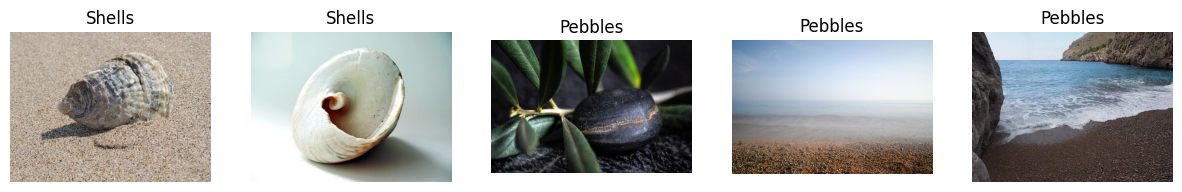

In [69]:
view_random_images(TRAIN_DIR, class_names=class_names)

# Create ImageDataGenerators

Create ImageDataGenerators to Rescale our images between 0 and 1 i.e., **Normalizing** the images. Also performing data augmentation.


In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255., 
                                 rotation_range=0.2, 
                                 width_shift_range=0.2, 
                                 height_shift_range=0.2, 
                                 zoom_range=0.2, 
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255., 
                                  rotation_range=0.2, 
                                  width_shift_range=0.2, 
                                  height_shift_range=0.2, 
                                  zoom_range=0.2, 
                                  horizontal_flip=True)

Creating training, validation and testing data

In [71]:
train_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary")

val_data = val_datagen.flow_from_directory(VAL_DIR,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode="binary")

test_data = test_datagen.flow_from_directory(TEST_DIR,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Found 2998 images belonging to 2 classes.
Found 856 images belonging to 2 classes.
Found 430 images belonging to 2 classes.


# Creating a basic model

In [72]:
import tensorflow as tf

In [73]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


c:\Users\Data science\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 602,141 (2.30 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [75]:
history_1 = model_1.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

c:\Users\Data science\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.6358 - loss: 0.6924 - val_accuracy: 0.6402 - val_loss: 0.6834
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.6480 - loss: 0.6807 - val_accuracy: 0.6402 - val_loss: 0.6755
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.6276 - loss: 0.6757 - val_accuracy: 0.6402 - val_loss: 0.6693
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.6493 - loss: 0.6660 - val_accuracy: 0.6402 - val_loss: 0.6647
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.6484 - loss: 0.6616 - val_accuracy: 0.6402 - val_loss: 0.6614
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.6362 - loss: 0.6619 - val_accuracy: 0.6402 - val_loss: 0.6588
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.6614 - loss: 0.6507 - val_accuracy: 0.6402 - val_loss: 0.6571
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6391 - loss: 0.6573 - val_accuracy: 0.6402 - val

## Plot the curves

In [76]:
def plot_curves(history):
  """
  A utility function that inputs a keras History object and plot the loss and accuracy (both training and validation) of the model 
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(20, 7))
  plt.rcParams['font.size'] = '16'

  # Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


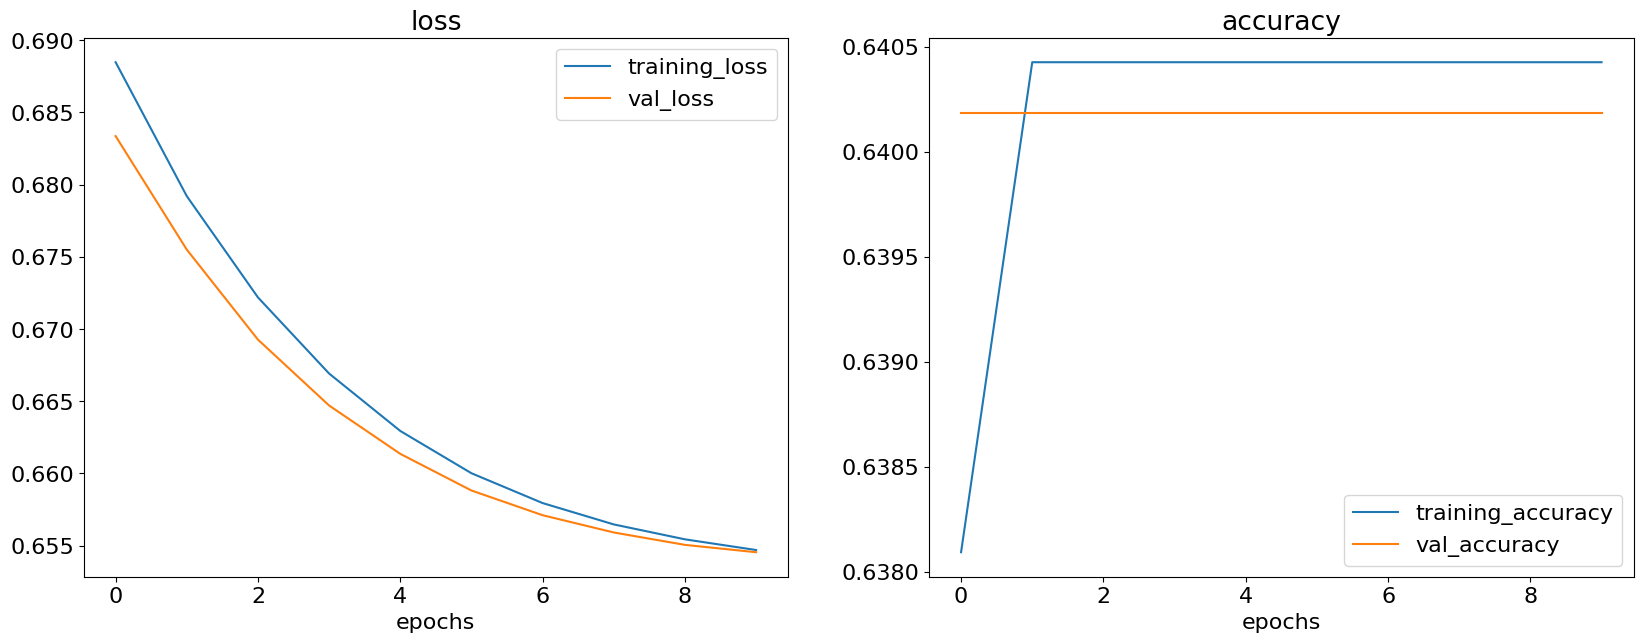

In [77]:
plot_curves(history_1)

## Get predictions on testing data

In [78]:
model_1.evaluate(test_data)

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 729ms/step - accuracy: 0.6597 - loss: 0.6453


[0.6548451781272888, 0.6395348906517029]

## Save the model

In [81]:
model_1.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Shells and Pebbles Detection models/my_model.keras")

# Improving the model (Adding Convolutional Layers)

In [82]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


c:\Users\Data science\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [84]:
history_2 = model_2.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.6237 - loss: 0.6468 - val_accuracy: 0.6472 - val_loss: 0.5949
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.6398 - loss: 0.6113 - val_accuracy: 0.6472 - val_loss: 0.5878
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.6641 - loss: 0.5981 - val_accuracy: 0.7033 - val_loss: 0.5779
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.6910 - loss: 0.6047 - val_accuracy: 0.6589 - val_loss: 0.5768
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.6957 - loss: 0.5865 - val_accuracy: 0.7021 - val_loss: 0.5729
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.6917 - loss: 0.5930 - val_accuracy: 0.6694 - val_loss: 0.5797
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.6948 - loss: 0.5866 - val_accuracy: 0.7056 - val_loss: 0.5758
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.7036 - loss: 0.5924 - val_accuracy: 0.6869 - v

## Plot the curves

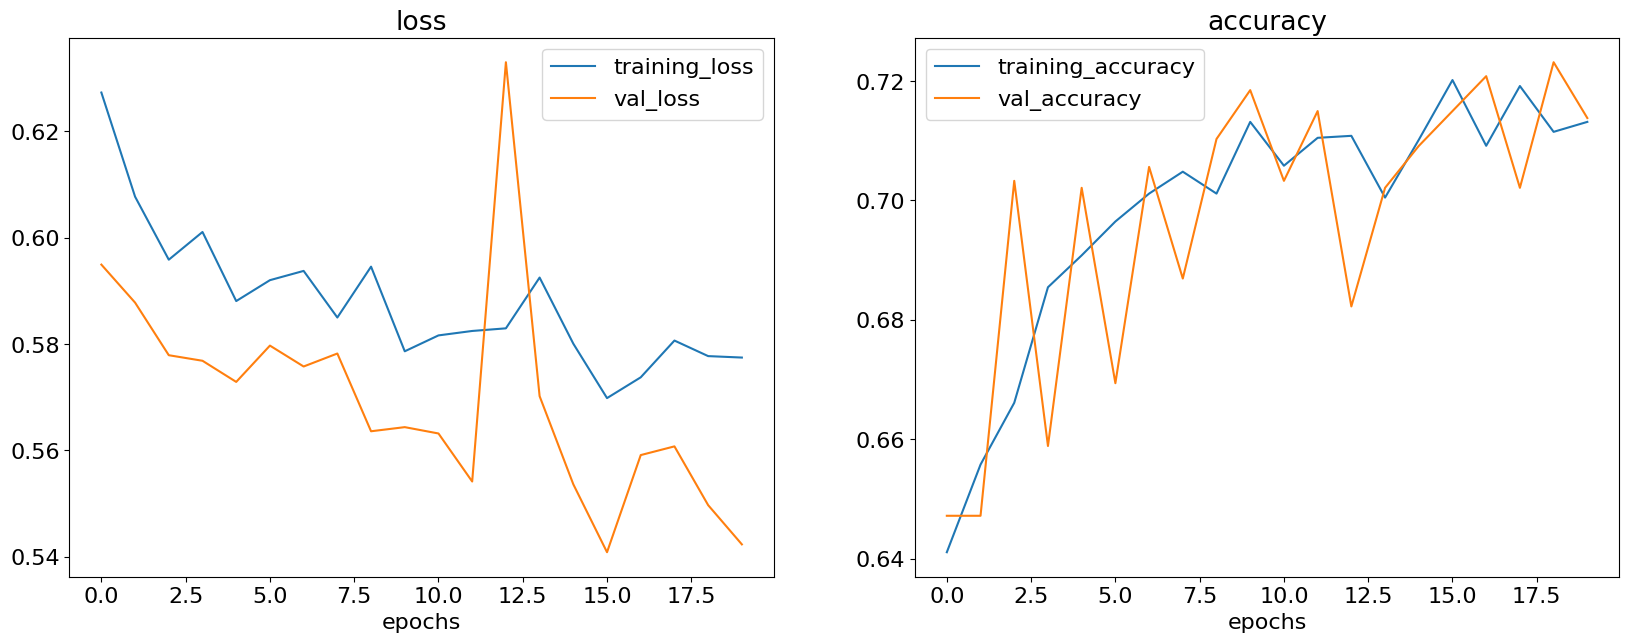

In [85]:
plot_curves(history_2)

## Get predictions on testing data

In [86]:
model_2.evaluate(test_data)

14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7343 - loss: 0.5583


[0.568161129951477, 0.7255814075469971]

## Save the model

In [87]:
model_2.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Shells and Pebbles Detection models/model_2.h5")

# Improving the model further (Adding MaxPooling Layers)

In [88]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),                                   
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [89]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,861 (34.61 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [ ]:
history_3 = model_3.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 915ms/step - accuracy: 0.6311 - loss: 0.6560

## Plot the curves

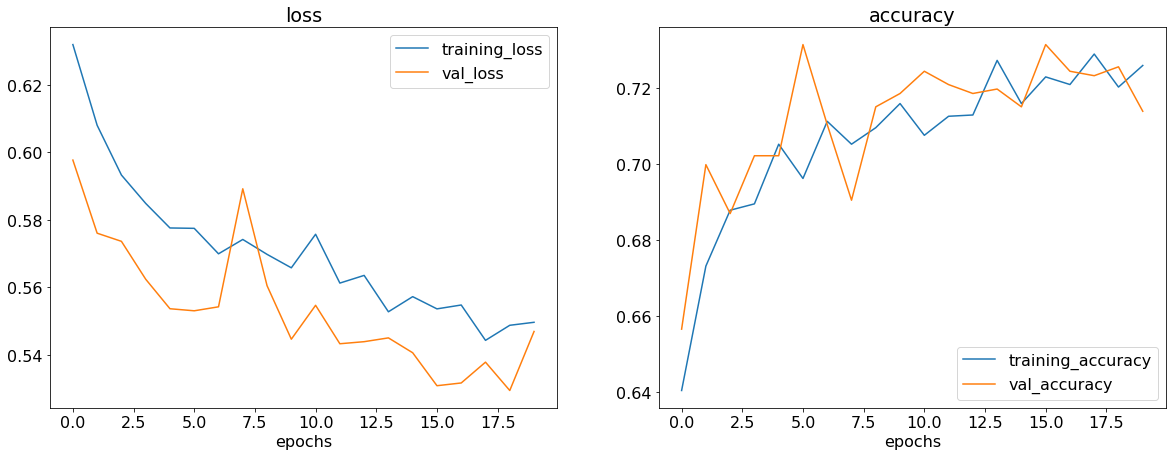

In [31]:
plot_curves(history_3)

## Get predictions on testing data

In [32]:
model_3.evaluate(test_data)

14/14 [==============================] - 5s 382ms/step - loss: 0.5635 - accuracy: 0.7279


[0.5634790658950806, 0.7279070019721985]

## Save the model

In [33]:
model_3.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Shells and Pebbles Detection models/model_3.h5")

# Transfer Learning

In [34]:
import tensorflow_hub as hub

In [35]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [36]:
model_4 = tf.keras.models.Sequential([
    hub.KerasLayer(resnet_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224)+(3,)),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')                                  
    ])

model_4.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [37]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 1)                 2049      
                                                                 
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


In [38]:
history_4 = model_4.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
94/94 [==============================] - 57s 565ms/step - loss: 0.4421 - accuracy: 0.8032 - val_loss: 0.3772 - val_accuracy: 0.8435
Epoch 2/20
94/94 [==============================] - 51s 543ms/step - loss: 0.3573 - accuracy: 0.8469 - val_loss: 0.3375 - val_accuracy: 0.8481
Epoch 3/20
94/94 [==============================] - 52s 557ms/step - loss: 0.3279 - accuracy: 0.8619 - val_loss: 0.3400 - val_accuracy: 0.8493
Epoch 4/20
94/94 [==============================] - 51s 544ms/step - loss: 0.3141 - accuracy: 0.8736 - val_loss: 0.3365 - val_accuracy: 0.8516
Epoch 5/20
94/94 [==============================] - 51s 546ms/step - loss: 0.3088 - accuracy: 0.8766 - val_loss: 0.3654 - val_accuracy: 0.8493
Epoch 6/20
94/94 [==============================] - 55s 588ms/step - loss: 0.2927 - accuracy: 0.8759 - val_loss: 0.3174 - val_accuracy: 0.8657
Epoch 7/20
94/94 [==============================] - 51s 548ms/step - loss: 0.2902 - accuracy: 0.8753 - val_loss: 0.3334 - val_accuracy: 0.8610

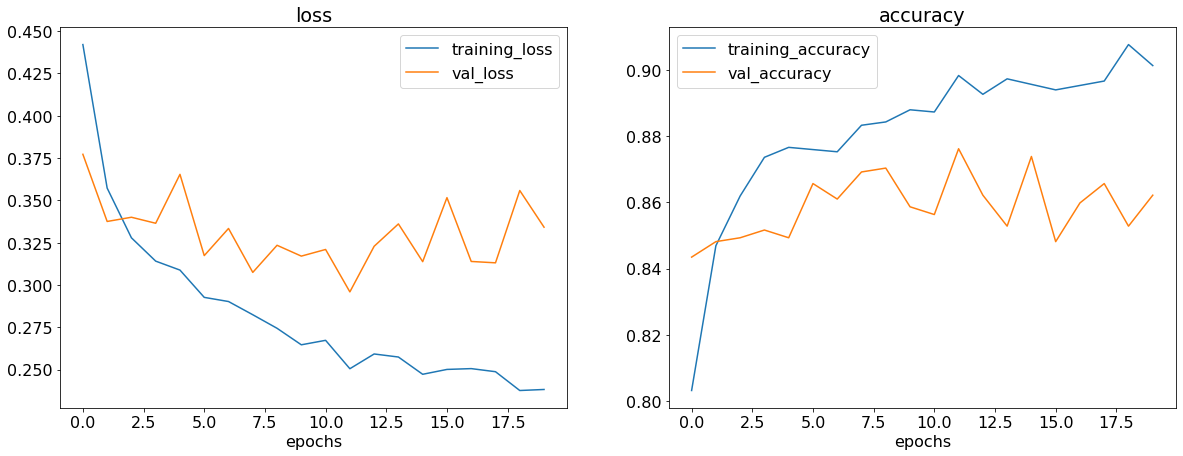

In [39]:
plot_curves(history_4)

In [90]:
model_4.evaluate(test_data)

NameError: name 'model_4' is not defined

In [41]:
model_4.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Shells and Pebbles Detection models/model_4.h5")

# Predict a random image from testing dataset

In [45]:
def pred_and_show(model, img_path, actual_class, class_names=class_names):
  """
  An utility function that uses the input model and makes prediction
  """
  # Read in the image
  img = tf.io.read_file(img_path)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [224, 224])
  # Rescale the image (get all values betwen 0 & 1)
  img = img/255.

  pred = model.predict(tf.expand_dims(img, 0))

  if len(class_names) > 2:
    class_name = class_names[int(tf.argmax(pred[0]))]
  else:
    class_name = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Actual: {actual_class}\nPredicted: {class_name}")
  plt.axis(False)

In [46]:
def pred_random_image(model, dir_path=TEST_DIR, class_names=class_names):
  """
  This function selects a random image from the specified directory and then predicts the possible class by calling the pred_and_show function
  """
  random_class = random.choice(class_names)

  img_path = dir_path + random_class + "/" + random.choice(os.listdir(dir_path + random_class))
  
  pred_and_show(model, img_path, random_class, class_names)

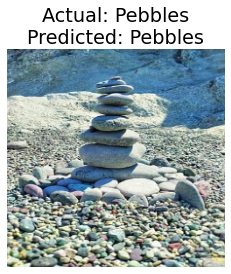

In [47]:
pred_random_image(model_4, TEST_DIR, class_names)